## Module 6 - Big Data Concepts

"Big data" is data we cannot handle "normally". That is, data that does not fit on a single computer and/or data that is constantly being added and updated (streaming data). The common attributes of big data include

- Volume (scale of data)
- Velocity (analysis of streaming data)
- Variety (different forms of data such as images, text, etc.)
- Veracity (uncertainty of data)
- Value

### Do we still need statistics with big data? Yes! 

Statisticians usually consider **populations** and **samples** and try to account for the variability in samples as they are related to populations. A population is the group of _all_ units we care about (e.g. all credit card transactions, all people who have a credit card in our company). It's difficult to measure everyone in a population, so statisticians measure a subset of the population (the so-called "sample"). Every sample will be a different subset of the population and will have different values in it. Our job as statisticians is to take the sample and relate it back to the population through _inference_ (i.e. infer something about the population from our samples). The main way to do this is through _hypothesis tests_ and _confidence intervals_.

The way we deal with inference, hypothesis tests, and confidence intervals is by making assumptions about the data-generating processes (e.g. our data will be sampled and we will assume that the population follows a normal distribution). We look at **sampling distributions**, which are the pattern and frequency with which we observe a statistic over the long run. There are many statistics, such as measures of center and spread (mean, median, standard deviation, etc.). Summaries about a population are called **parameters**. 

The most commonly looked-at statistic is the sample mean, $\bar{Y}$. We then try to infer the population mean, $\mu$. The central limit theorem (CLT) tells us that we know the distribution of our sample mean in large samples - $\bar{Y} \sim N(\mu, \frac{\sigma^2}{n})$ (read as "Y bar has a distribution that is normal with mean $\mu$ and variance of sigma squared over n"). We take this sampling distribution idea and we construct a hypothesis test (HT) or we create a confidence interval (CI) to make our inference.

#### Example - sampling distributions

- Population - all customers at a bank
- Parameter (p) - proportion of customers willing to open an additional account (historically 0.15)
- Sample - observe 40 _independent_ customers
- Statistic - sample proportion, $\hat{p}=8/40=0.2$, where 8 customers out of the 40 we asked would open a new account after intervention

Suppose we've done an intervention, whereby we've either changed the structure of the additional accounts to make them more lucrative to people or we're marketing it in a different way. We want to see if $p$ has changed (increased) after our intervention. We want to relate (or infer) our $8/40$ ratio back to the population.   

Question: is the population proportion greater than 0.15?

Answer: one way to answer is to use a hypothesis test and ask if observing $\hat{p}=8/40=0.2$ reasonable of $p=0.15$ is the true proportion.

We can draw samples. In one possible sample, $\hat{p}=8/40$, and in another, $\hat{p}=11/40$. What is the pattern and frequency here? Normally, we'd need to learn sampling theory. However, with Python, we can simulate this experiment many times to understand the sampling distribution of $\hat{p}$.

- Assumptions on our data generating process: 
    - p = 0.15
    - n = 40
    - Independent customers coming in

It turns out that, if we define $Y$ as the number of people (out of the 40) willing to open an account, then a reasonable distribution for $Y$ is a binomial, $Y \sim Bin(n=40, p=0.15)$. The tilde is shorthand for "is distributed".

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [7]:
# Generate random values from different statistical distributions
np.random.seed(5)

# Get random values from a binomial
stats.binom.rvs(n=40, p=0.15, size=1) # size is the number of Y's to draw (i.e. give me 1 draw of 40 people and count the number of people that would open a new account)

array([4])

Above, 4 people out of 40 would open a new account.

In [4]:
stats.binom.rvs(n=40, p=0.15, size=2)

array([9, 4])

Above, in the first run, 9 people said "yes". In the second run, only 4 people said "yes".

These have been actual counts, but we want $\hat{p}$, the proportion.

In [10]:
# Get proportion (p-hat), rather than count
np.random.seed(5)
stats.binom.rvs(n=40, p=0.15, size=1)/40

array([0.1])

In [11]:
stats.binom.rvs(n=40, p=0.15, size=2)/40

array([0.225, 0.1  ])

We can very easily generate $\hat{p}$ values. To generate far more than just 2, we can do the following:

Text(0.5, 1.0, 'Sampling Distribution of p-hat for n=40 and p=0.15')

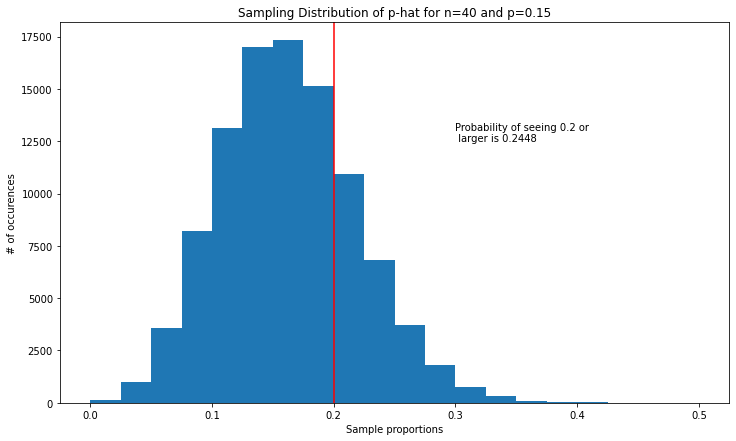

In [12]:
proportion_draws = stats.binom.rvs(n=40, p=0.15, size=100000)/40
plt.figure(figsize=(12,7))
plt.hist(proportion_draws, bins = [x/40 for x in range(0,21)])
plt.axvline(x=8/40, c="Red")
plt.text(
    x=0.3,
    y=12500,
    s = "Probability of seeing 0.2 or \n larger is " + str(round(np.mean(proportion_draws>=0.2), 4))
)
plt.xlabel("Sample proportions")
plt.ylabel("# of occurences")
plt.title("Sampling Distribution of p-hat for n=40 and p=0.15")

We see that our p-value is 0.2448. Therefore, we do not have much evidence to reject our assumptions on the data-generating process. There's a 25% chance of seeing what we saw (or worse) under the assumptions in our title. What we saw is perfectly reasonable under these assumptions, so we do not have evidence to reject these assumptions.    

Sometimes, we can record every user action...don't we have everything? Is there any variability to consider (i.e. "with enough data, the numbers speak for themselves"). The issues are

1. We don't actually observe everything that would be relevant (did the user mean to click on an ad, or was it clicked by accident?)
2. Superpopulation idea - we have "n=all", such as all of the emails within a company (who's emailing who, the content, etc.). If this day happened again, would those emails go exactly the same? Or, would one person get a call to pick up their child, cancel meetings, and cascade to others? Thus, the one day we actually observed is just a subset of the superpopulation of all possible days we could have observed (i.e. there is day-to-day variability), and we can still make inferences on the data-generating process. 

#### Modeling for n=1

Moreover, with big data, we can now consider user-level (or observational unit level) modeling. In past years, with a population size of $n=1$, we couldn't really do any statistics on it because with statistics, we generally look at variability. If one alien on Mars approached out and it was 4 feet tall, what could we say about the heights of aliens? We have an estimate of how tall the aliens are (4 feet), but we do have any idea about the variability in heights? No! However, as soon as we see a second alien ($n=2$), we now have an idea of the variability between heights.

However, now, even with one unit, we will be able to observe it over time (and still see other units over time also). This allows us to aggregate across people and look at individual user paths as well. Some studies have attempted to model user intention on social media networks to detect depression. There is a baseline model with all status updates analyzed using sentiment analysis (positive and negative words), when statuses are updated, etc.  

#### Rare events in big data

When we have tons and tons of data, even a rare event can happen reasonably often, just by chance.  

##### Independence of events

Two events A and B are independent if the probability of them occurring together is equal to the product of the two individual probabilities - i.e. $P(A \cap B) = P(A)P(B)$. Intuitively, this implies that knowledge of one event tells us nothing about the probability of another.

Is a certain type of coin fair (equal probability of flipping a head and a tail)? Assume $p=P(head)=0.5$. 

Experiment: flip one of these coins 10 times. If 10 heads or 10 tails appear, declare the coin biased.

P(false positive) = P(concluding coin is biased) = P(10 heads) + P(10 tails) = $0.5^{10} + 0.5^{10} = 0.001953125$. This is very rare!

P(10 heads) = P(1st H $\cap$ 2nd H $\cap$ 3rd H $\cap$ ... $\cap$ 10th H) = P(1st H)P(2nd H)...P(10th H) (assuming independence)

Suppose we don't just run this experiment once, but we look at 1000 separate (independent) runs of the experiment. Seeing any 1 coin of the 1000 being declared is quite likely!

P(all 1000 coins identified as fair) = P(1st fair $\cap$ 2nd fair $\cap$...1000th fair) = $(1-0.001953125)^{1000}=0.1416$

P(at least 1 false positive) = P(at least 1 coin of the 1000 is classified as biased) = $1-0.1416 = 0.8584$